### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")


Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58


# 2. Vendas por Categoria


In [3]:
# Criando um dicionário para armazenar os DataFrames das lojas
lojas = {
    'loja_1': loja,
    'loja_2': loja2,
    'loja_3': loja3,
    'loja_4': loja4
}

for nome_loja, df_loja in lojas.items():
    vendas_por_categoria = df_loja.groupby('Categoria do Produto')['Preço'].count()
    print(f"\nVendas por categoria na {nome_loja}:")
    print(vendas_por_categoria)
    print(f"\nAs categorias mais populares na {nome_loja} são:")
    print(vendas_por_categoria.nlargest(3)) # Mostra as 3 categorias mais populares



Vendas por categoria na loja_1:
Categoria do Produto
brinquedos               324
eletrodomesticos         312
eletronicos              448
esporte e lazer          284
instrumentos musicais    182
livros                   173
moveis                   465
utilidades domesticas    171
Name: Preço, dtype: int64

As categorias mais populares na loja_1 são:
Categoria do Produto
moveis         465
eletronicos    448
brinquedos     324
Name: Preço, dtype: int64

Vendas por categoria na loja_2:
Categoria do Produto
brinquedos               313
eletrodomesticos         305
eletronicos              422
esporte e lazer          275
instrumentos musicais    224
livros                   197
moveis                   442
utilidades domesticas    181
Name: Preço, dtype: int64

As categorias mais populares na loja_2 são:
Categoria do Produto
moveis         442
eletronicos    422
brinquedos     313
Name: Preço, dtype: int64

Vendas por categoria na loja_3:
Categoria do Produto
brinquedos              

# 3. Média de Avaliação das Lojas

In [4]:
for nome_loja, df_loja in lojas.items():
    media_avaliacoes = df_loja['Avaliação da compra'].mean()
    print(f"\nMédia de avaliações na {nome_loja}: {media_avaliacoes:.2f}")



Média de avaliações na loja_1: 3.98

Média de avaliações na loja_2: 4.04

Média de avaliações na loja_3: 4.05

Média de avaliações na loja_4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [5]:
for nome_loja, df_loja in lojas.items():
    vendas_por_produto = df_loja.groupby('Produto')['Preço'].count()
    mais_vendidos = vendas_por_produto.nlargest(5)  # 5 produtos mais vendidos
    menos_vendidos = vendas_por_produto.nsmallest(5)  # 5 produtos menos vendidos

    print(f"\nProdutos mais vendidos na {nome_loja}:")
    print(mais_vendidos)

    print(f"\nProdutos menos vendidos na {nome_loja}:")
    print(menos_vendidos)



Produtos mais vendidos na loja_1:
Produto
Guarda roupas         60
Micro-ondas           60
TV Led UHD 4K         60
Secadora de roupas    58
Blocos de montar      56
Name: Preço, dtype: int64

Produtos menos vendidos na loja_1:
Produto
Celular ABXY                   33
Headset                        33
Panela de pressão              35
Pandeiro                       36
Ciência de dados com python    39
Name: Preço, dtype: int64

Produtos mais vendidos na loja_2:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Pandeiro                    58
Violão                      58
Name: Preço, dtype: int64

Produtos menos vendidos na loja_2:
Produto
Jogo de tabuleiro    32
Impressora           34
Mesa de jantar       34
Poltrona             35
Fone de ouvido       37
Name: Preço, dtype: int64

Produtos mais vendidos na loja_3:
Produto
Kit banquetas      57
Cama king          56
Mesa de jantar     56
Cômoda             55
Jogo de panelas    55

# 5. Frete Médio por Loja


In [6]:
for nome_loja, df_loja in lojas.items():
    frete_medio = df_loja['Frete'].mean()
    print(f"\nFrete médio na {nome_loja}: R${frete_medio:,.2f}")



Frete médio na loja_1: R$34.69

Frete médio na loja_2: R$33.62

Frete médio na loja_3: R$33.07

Frete médio na loja_4: R$31.28


# 6. Graficos Gerados

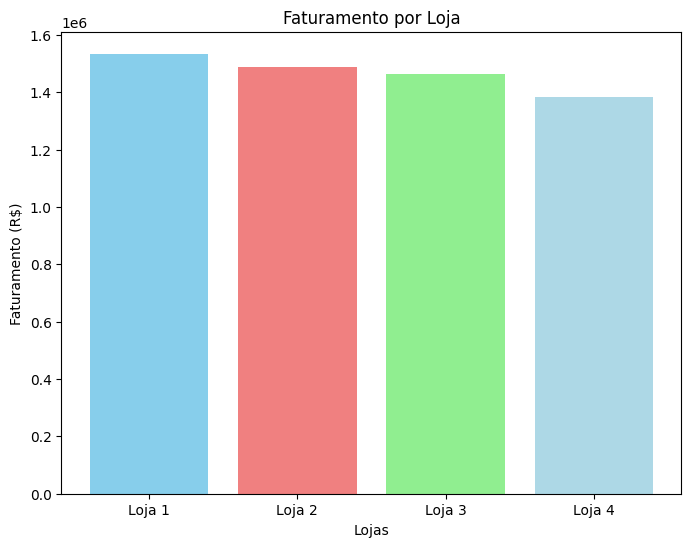

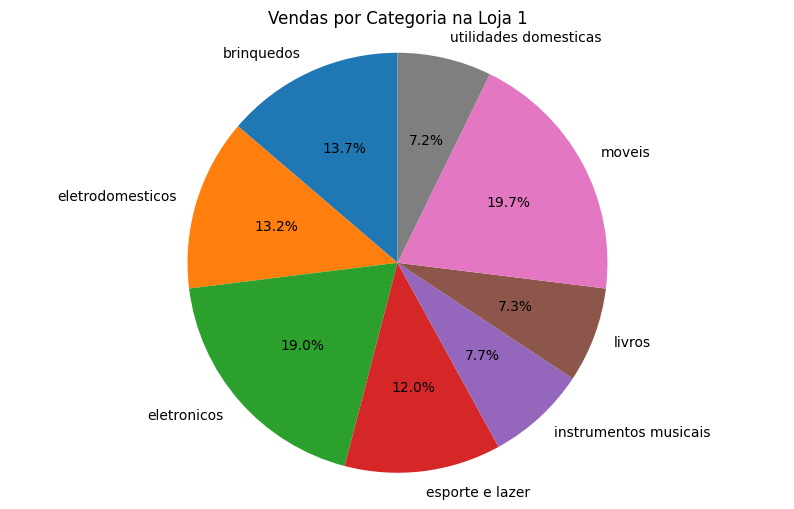

In [7]:
import matplotlib.pyplot as plt

# Faturamento por Loja
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
plt.figure(figsize=(8, 6))
plt.bar(lojas, faturamento, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.show()


# Vendas por categoria na Loja 1
vendas_por_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].count()
plt.figure(figsize=(10, 6))
plt.pie(vendas_por_categoria_loja1, labels=vendas_por_categoria_loja1.index, autopct='%1.1f%%', startangle=90)
plt.title('Vendas por Categoria na Loja 1')
plt.axis('equal')  # Funcao Equal desenha como um circulo
plt.show()



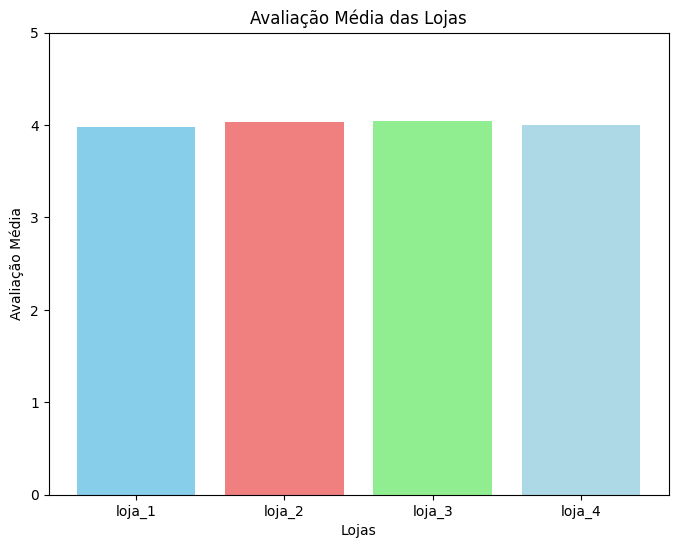

In [8]:
import matplotlib.pyplot as plt

# Redefinindo 'lojas' para o dicionário original
lojas = {
    'loja_1': loja,
    'loja_2': loja2,
    'loja_3': loja3,
    'loja_4': loja4
}

# Avaliação Média das Lojas
avaliacoes_medias = []
for nome_loja, df_loja in lojas.items():
    media_avaliacoes = df_loja['Avaliação da compra'].mean()
    avaliacoes_medias.append(media_avaliacoes)

plt.figure(figsize=(8, 6))
# Usando list(lojas.keys()) para obter os nomes das lojas para o eixo x
plt.bar(list(lojas.keys()), avaliacoes_medias, color=['skyblue', 'lightcoral', 'lightgreen', 'lightblue'])
plt.title('Avaliação Média das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Avaliação Média')
plt.ylim(0, 5)  # Define o limite do eixo y de 0 a 5 para melhor visualização
plt.show()

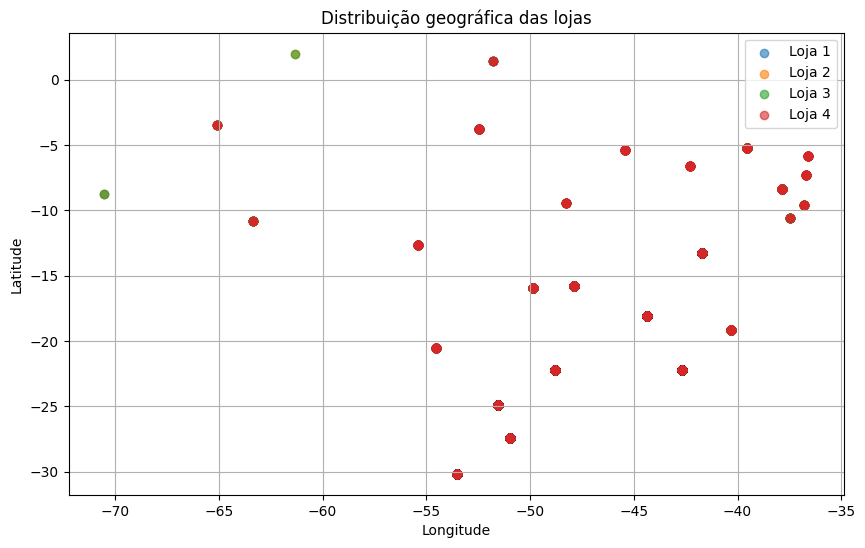

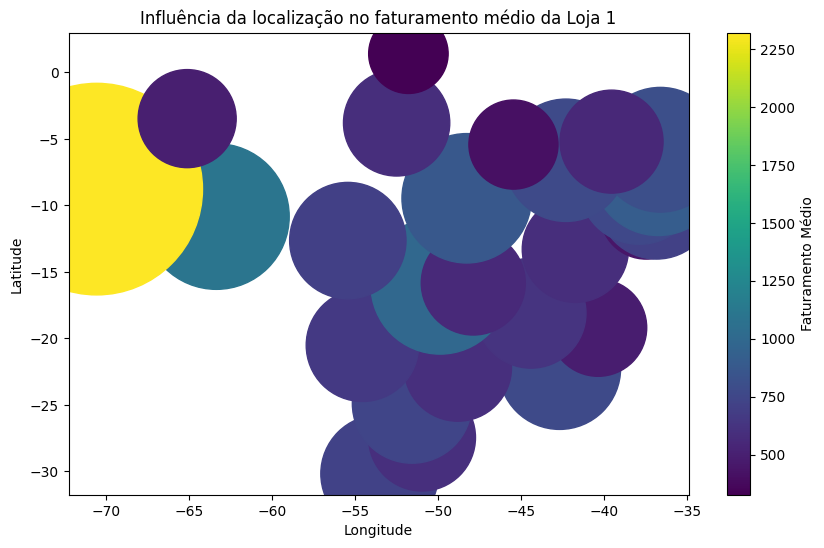

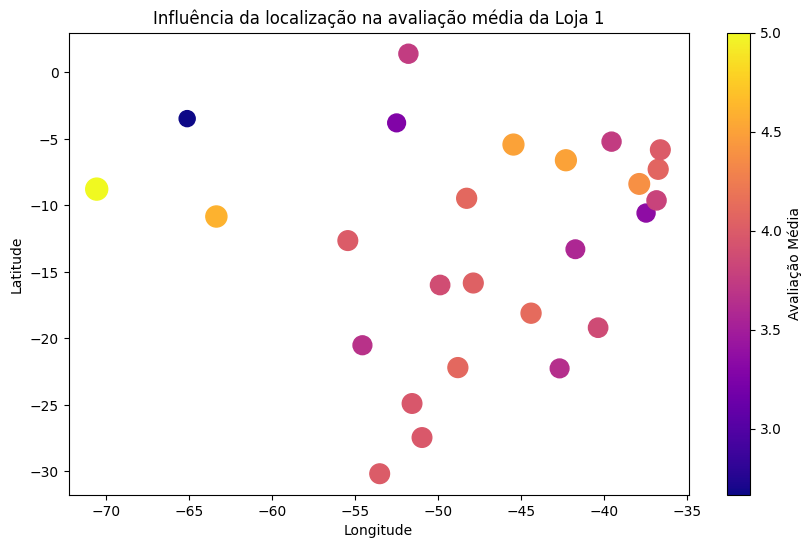

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.concat([loja, loja2, loja3, loja4], keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], names=['Loja', 'Index'])

plt.figure(figsize=(10, 6))
for loja_name, df in combined_df.groupby('Loja'):
    plt.scatter(df['lon'], df['lat'], label=loja_name, alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição geográfica das lojas')
plt.legend()
plt.grid(True)
plt.show()


loja_geo_performance = loja.groupby(['lat', 'lon'])[['Preço', 'Avaliação da compra']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(loja_geo_performance['lon'], loja_geo_performance['lat'], s=loja_geo_performance['Preço'] * 10, c=loja_geo_performance['Preço'], cmap='viridis')
plt.colorbar(label='Faturamento Médio')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Influência da localização no faturamento médio da Loja 1')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(loja_geo_performance['lon'], loja_geo_performance['lat'], s=loja_geo_performance['Avaliação da compra'] * 50, c=loja_geo_performance['Avaliação da compra'], cmap='plasma')
plt.colorbar(label='Avaliação Média')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Influência da localização na avaliação média da Loja 1')
plt.show()